In [78]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.
(1, 45)


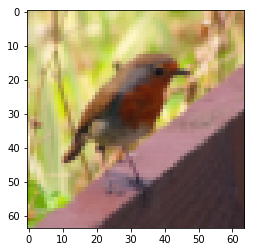

In [80]:
# Example of a picture
index = 10

plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

# The folloding code is changed by me
#train_y = np.array([[87,95,87,52,78,51,92,69,82,83,82,94,86,95,87,83,92,75,71]])
train_y = np.array([[1,0,0,0,1,0,0,1,1,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0]])
print(train_y.shape)



In [82]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))


Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 45)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [83]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
#train_x = train_x_flatten/255.
#train_x = np.array([[5.5,6.5,7,1,2,0.5,10,4,5,1,3.5,7,5.5,9,7,7,8.5,8,0],[3.5,5.5,4,4.5,4.5,1.5,7.5,4.5,3,5,1,7,5.5,5,5,4.5,5.5,4.5,1.5],[3,3,4.5,5,5.5,4,7,5,3.5,5.5,1,2,5.5,5,7,3,3.5,5.5,0.5], [6.5,9,6,2,0,0.5,8.5,8.5,2.5,6,6.5,9,5.5,8.5,10,6.5,7.5,7,1.5],[10,10.5,8.5,6,5.5,4.5,12,4.5,8.5,8,4.5,5,8,6.5,10,4.5,10,8.5,3.5],[5,7,7,4,2,1.5,6.5,3.5,2,2,4,5.5,5.5,4.5,5,4.5,5,6.5,0],[1,2,4,0,0.5,0,4,2,1,2,0,2,1.5,2,2.5,0.5,0,1,0],[5.5,5,6.5,2,3,1,10.5,4,6,5,3.5,5,3,6.5,9.5,6.5,8,9.5,5.5],[7,6,5,0,4,0,4.5,5.5,7.5,4,5,7.5,4,8,4,6,8,1.5,2],[4,3.5,3,0,1,1,2,1,2.5,2,1,4,2,2,2.5,1,2,2,1],[8,10,4,2,5,0,5.5,4.5,7.5,4,6.5,10,8,9,4,7,10,6,5.5],[4.5,7.5,4.5,0.5,1.5,2,4,4,4.5,4,5,8,2,9,2,8.5,7,1,2],[14,13.5,6.5,2.5,12,1,5,3.5,8.5,4.5,6,13,9,14,9.5,12.5,13,7,7.5],[2,6,1.5,0,2,0,2,0,2,2,1,5,1,5.5,2.5,5.5,6,1,0],[4,4,0,0.5,0,0,2,0,0,1,0,4,1,2.5,3,3,2,0,0],[13,10.5,9,4,7.5,0,8,4,10,3.5,3.5,9.5,9.5,11.5,8,10,10.5,9.5,7.5]])
train_x=np.array([[18.5,18.5,8,11.5,21.5,8,8,8,22,11,13,22,18.5,17,5.5,17,10.5,13.5,19.5,21,18.5,13.5,7,20.5,15.5,10,18.5,14,14,14.5,15.5,4,10.5,13,7,2.5,14,10.5,18.5,8.5,13,17.5,10.5,14,15],[16,21.5,14,11,23,7,7,7,23.5,16,16,24.5,20,17,8,7,9,16,18.5,20.5,21.5,19.5,9,24,15.5,17,24,15.5,22.5,8.5,19,13.5,7.5,14.5,11.5,23,15.5,14.5,19.5,16.5,6.5,22,20.5,12.5,10],[8.5,3.5,0,2,8,2,2,2,8.5,6,3.5,9.5,4.5,8,3,4,0,2.5,6,8.5,8,5.5,0,10.5,3,4.5,10,6,6.5,3.5,6.5,2,3.5,0,0,6,4.5,4.5,5,7,3,7.5,8,6,0],[26,21,23,24,26,21.5,21.5,21.5,27,26,23.5,26.5,27,23.5,19,16,14.5,28,24.5,26.5,28,22,20.5,26,27,22,27.5,27,26.5,22,27.5,24,21,27.5,23,25,23.5,26,24.5,24,16.5,24.5,25.5,18,26],[8,2,3.5,0,7,8.5,2.5,8.5,8.5,8,8,8.5,8.5,8,5.5,5.5,3,7.5,8.5,8.5,7.5,8.5,8.5,8,8,8.5,9,8,7.5,5,7.5,6.5,5,8,7.5,8,8.5,7,9,0,6.5,6.5,6.5,8.5,6.5],[14,16,12.5,0,9.5,11,10,18,21.5,16.5,13.5,20,11,19.5,6.5,20,9.5,11.5,18,20.5,17.5,14,11,22,16.5,19,23,15,16.5,13.5,19.5,5.5,9.5,9.5,14.5,15,15,14,16.5,10,10,5,22.5,13,13],[28.5,24.5,6,0,3,10.5,9,21,30.5,21.5,23,32,19.5,28.5,12,20,16.5,20.5,12,28.5,28.5,15,5.5,32.5,22.5,25,35.5,16,29.5,13,21,5,5.5,5,11.5,17.5,15,17.5,20.5,21,11.5,26.5,29,8,4.5],[17.5,19,17.5,0,13.5,13,13,10.5,20,13,14,20,17,17,11,17.5,0,16,16,16.5,17,17,14.5,18,16.5,14,17.5,17,17.5,16.5,17,15,16.5,16,17.5,1,16,13,16.5,15,4.5,11.5,16.5,16,17.5]]
)
test_x = test_x_flatten/255.
#text_x = np.array([[5.5,6.5,7,1,2,0.5,10,4,5,1,3.5,7,5.5,9,7,7,8.5,8,0],[3.5,5.5,4,4.5,4.5,1.5,7.5,4.5,3,5,1,7,5.5,5,5,4.5,5.5,4.5,1.5],[3,3,4.5,5,5.5,4,7,5,3.5,5.5,1,2,5.5,5,7,3,3.5,5.5,0.5], [6.5,9,6,2,0,0.5,8.5,8.5,2.5,6,6.5,9,5.5,8.5,10,6.5,7.5,7,1.5],[10,10.5,8.5,6,5.5,4.5,12,4.5,8.5,8,4.5,5,8,6.5,10,4.5,10,8.5,3.5],[5,7,7,4,2,1.5,6.5,3.5,2,2,4,5.5,5.5,4.5,5,4.5,5,6.5,0],[1,2,4,0,0.5,0,4,2,1,2,0,2,1.5,2,2.5,0.5,0,1,0],[5.5,5,6.5,2,3,1,10.5,4,6,5,3.5,5,3,6.5,9.5,6.5,8,9.5,5.5],[7,6,5,0,4,0,4.5,5.5,7.5,4,5,7.5,4,8,4,6,8,1.5,2],[4,3.5,3,0,1,1,2,1,2.5,2,1,4,2,2,2.5,1,2,2,1],[8,10,4,2,5,0,5.5,4.5,7.5,4,6.5,10,8,9,4,7,10,6,5.5],[4.5,7.5,4.5,0.5,1.5,2,4,4,4.5,4,5,8,2,9,2,8.5,7,1,2],[14,13.5,6.5,2.5,12,1,5,3.5,8.5,4.5,6,13,9,14,9.5,12.5,13,7,7.5],[2,6,1.5,0,2,0,2,0,2,2,1,5,1,5.5,2.5,5.5,6,1,0],[4,4,0,0.5,0,0,2,0,0,1,0,4,1,2.5,3,3,2,0,0],[13,10.5,9,4,7.5,0,8,4,10,3.5,3.5,9.5,9.5,11.5,8,10,10.5,9.5,7.5]])

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (8, 45)
test_x's shape: (12288, 50)


In [84]:
### CONSTANTS DEFINING THE MODEL ####
#n_x = 12288     # num_px * num_px * 3
n_x = 8
n_h = 3     #n_h = 7 
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [85]:
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    parameters = initialize_parameters(n_x, n_h, n_y)
    m = Y.shape[1] # number of example
        
    # Retrieve W1 and W2 from parameters
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters['W1']
    W2 = parameters['W2']
    ### END CODE HERE ###
    
   
    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 -Y), np.log(np.abs(1- A2)))
    #print(np.log(np.abs(1 - A2)))
    cost = - np.sum(logprobs) / m
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [86]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = .0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
       
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")
        
        #A2[:] = [x * 100 for x in A2]
        #A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "relu")
        
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        
        cost = compute_cost(A2, Y)
        
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        #dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

(8, 45)
(1, 45)
Cost after iteration 0: 0.6931648468864686
Cost after iteration 100: 0.6893631508222565
Cost after iteration 200: 0.6867658901123032
Cost after iteration 300: 0.684945657573502
Cost after iteration 400: 0.6834499789960625
Cost after iteration 500: 0.6816588199713057
Cost after iteration 600: 0.677536528487616
Cost after iteration 700: 0.6676757151499375
Cost after iteration 800: 0.6528548801909854
Cost after iteration 900: 0.6380412030656721
Cost after iteration 1000: 0.6214347023053761
Cost after iteration 1100: 0.6052413431199563
Cost after iteration 1200: 0.5923304777780333
Cost after iteration 1300: 0.5821000210664395
Cost after iteration 1400: 0.5738541648386435
Cost after iteration 1500: 0.5660750788169397
Cost after iteration 1600: 0.5582008533245864
Cost after iteration 1700: 0.5542434097495935
Cost after iteration 1800: 0.5477025210860961
Cost after iteration 1900: 0.5421882696286472
Cost after iteration 2000: 0.5383615935820983
Cost after iteration 2100: 0.533

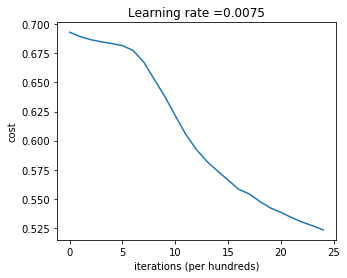

In [87]:
print(train_x.shape)
print(train_y.shape)
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [88]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    #assert(A2.shape == (16, X.shape[1]))
    
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [89]:
predictions_train = predict(train_x, train_y, parameters)
A2, cache = forward_propagation(train_x, parameters)

Accuracy: 0.711111111111


In [90]:
test_x = np.array([[17,17,18,16.5,17,11,19,20,19,19,17,18,14,21,9,25,14,10,18,16,18.5,15,11,9,4,10,15,17,16,16,23,24,16,21,14,15],[17,16,22,16,19,18,18,17,20,18,18.5,17.5,18,13,21.5,20.5,17,13,20.5,17,23.5,19.5,13,15,15,16,20.5,15,13,23,23.5,17,11,23.5,16,16.5],[6,6,4,7,6,3,4,0,0,7,6,7,8,2,9,8,4,4,7,6,10,6,6,6,0,6,0,0,6,9,9,7,0,10,7,9],[23,22,24,23,21,22,22,22,18,18,21,18,22,21,18,23,21,22,23,21,23,23,24,24,22,20,25,21,21,22,24,23,24,21,23.5,20],[4,7,5,7,6,6,0,6,4,8,8,5,5,7,4,6,5,6,5,5,4,8,5,5,5,6,7,5,8,7,7,5,7,6,7,7],[19,19,26,19,15,11,19,22,14,23,23,22,18,22,16,23.5,16,11,14,17,20,14,12,10,16,9,14,20,17,17,23,14,20,20,8,19],[14,30,16,24,30,20,24,18,23,27,28.5,24,30,14,26,24,20,26,25,33,32,22,17,23,18,15,16,17,17,30,33,17,21,34,29,26.5],[18,16,17,18,16,16,18,16,15,18,17,17,12,17,15,19,15,17,19,15,18,18,17,16,17,18,17,18,17,17,20,18,19,17,16,17]]
)
test_y = np.array([[1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0]])
print(test_x.shape)
predictions_test = predict(test_x, test_y, parameters)

(8, 36)
Accuracy: 0.583333333333
